In [13]:
import pynbody
import numpy as np

pynbody.config['halo-class-priority'] =  [pynbody.halo.ahf.AHFCatalogue,
                                          pynbody.halo.GrpCatalogue,
                                          pynbody.halo.AmigaGrpCatalogue,
                                          pynbody.halo.legacy.RockstarIntermediateCatalogue,
                                          pynbody.halo.rockstar.RockstarCatalogue,
                                          pynbody.halo.subfind.SubfindCatalogue, pynbody.halo.hop.HOPCatalogue]

bary = {'h148':'/home/akinshol/Data/Sims/h148_200bkgdens/h148.cosmo50PLK.3072g3HbwK1BH.004096',
        'h229':'/home/akinshol/Data/Sims/h229_200bkgdens/h229.cosmo50PLK.3072gst5HbwK1BH.004096',
        'h242':'/home/akinshol/Data/Sims/h242_200bkgdens/h242.cosmo50PLK.3072gst5HbwK1BH.004096',
        'h329':'/home/akinshol/Data/Sims/h329_200bkgdens/h329.cosmo50PLK.3072gst5HbwK1BH.004096'}

dm = {'h148':'/home/christenc/Data/Sims/h148.cosmo50PLK.3072g/h148.cosmo50PLK.3072/h148.cosmo50PLK.3072.004096',
     'h229':'/home/christenc/Data/Sims/h229.cosmo50PLK.3072g/h229.cosmo50PLK.3072/h229.cosmo50PLK.3072.004096',
     'h242':'/home/christenc/Data/Sims/h242.cosmo50PLK.3072g/h242.cosmo50PLK.3072/h242.cosmo50PLK.3072.004096',
     'h329':'/home/christenc/Data/Sims/h329.cosmo50PLK.3072g/h329.cosmo50PLK.3072/h329.cosmo50PLK.3072.004096'}

simnames = ['h148','h229','h242','h329']

In [2]:
halo_masses = np.array([])
for simname in simnames:
    s = pynbody.load(dm[simname])
    s.physical_units()
    h = s.halos()
    
    h1 = h.load_copy(1)
    
    M = np.sum(h1.dm['mass']).in_units('Msol')
    print(simname, M)
    halo_masses = np.append(halo_masses, M)

h148 1809832755375.2158
h229 1020524520977.4414
h242 971794738126.704
h329 632539859799.0082


In [14]:
B_mags = np.array([])
V_mags = np.array([])
for simname in simnames:
    s = pynbody.load(bary[simname])
    s.physical_units()
    h = s.halos()
    
    h1 = h.load_copy(1)
    
    V = pynbody.analysis.luminosity.halo_mag(h1.star, band='v')
    B = pynbody.analysis.luminosity.halo_mag(h1.star, band='b')
    
    print(simname, V, B)
    B_mags = np.append(B_mags, B)
    V_mags = np.append(V_mags, V)

h148 -22.67719119618802 -22.199835003059935
h229 -21.76600350076822 -21.22329532035314
h242 -21.367024019520258 -20.720804717814175
h329 -21.753077872115526 -21.22062283747391


In [15]:
L_V = 10**(-(V_mags-4.8)/2.5)
M_star = L_V * 10**(-0.734 + 1.404*(B_mags - V_mags))

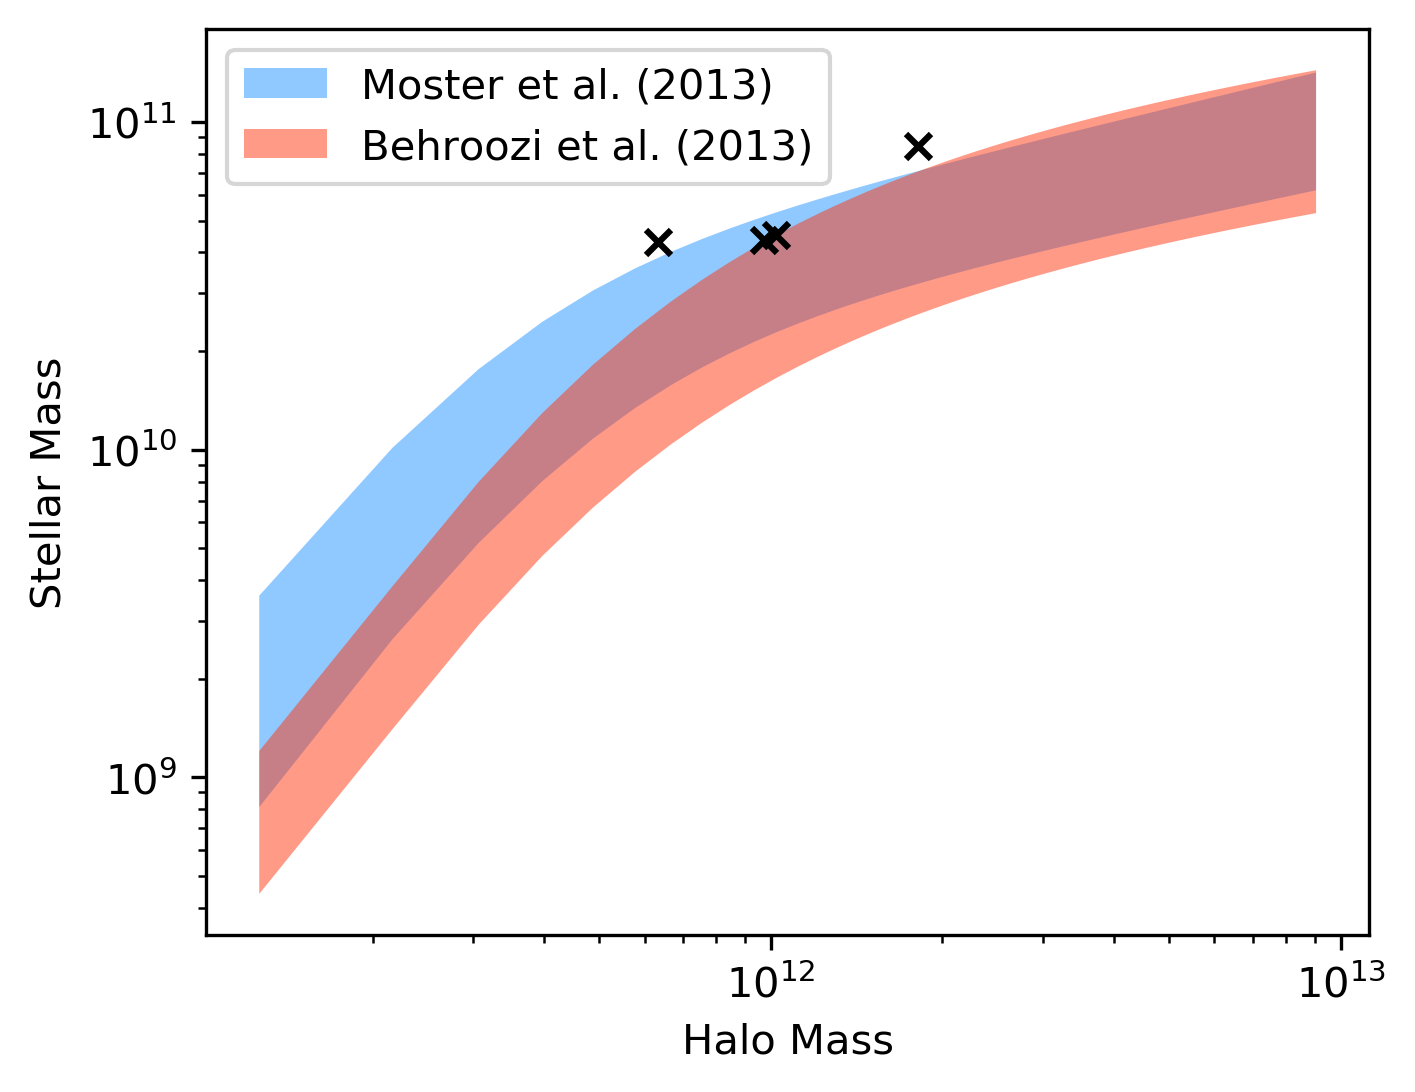

In [34]:
import matplotlib.pyplot as plt
mass_range = np.linspace(0.2*np.min(halo_masses), 5*np.max(halo_masses), 100)
fig, ax = plt.subplots(1,1,figsize=(5,4),dpi=300)
m_SM, m_errors = pynbody.plot.stars.moster(mass_range,0)
b_SM, b_errors = pynbody.plot.stars.behroozi(mass_range,0)
ax.fill_between(mass_range,np.array(m_SM)/np.array(m_errors),y2=np.array(m_SM)*np.array(m_errors),facecolor='#2395ff',edgecolor='none',alpha=0.5,label='Moster et al. (2013)')
ax.fill_between(mass_range,np.array(b_SM)/np.array(b_errors),y2=np.array(b_SM)*np.array(b_errors),facecolor='#ff3611',edgecolor='none',alpha=0.5,label='Behroozi et al. (2013)')

ax.scatter(np.array(halo_masses,dtype=float), np.array(M_star,dtype=float), color='k',marker='x')
ax.loglog()
plt.legend()
plt.xlabel('Halo Mass')
plt.ylabel('Stellar Mass')
plt.show()

In [33]:
import pandas as pd
smhm = pd.DataFrame(zip(simnames,halo_masses,M_star), columns=['Sim','Mvir','Mstar'])
smhm.to_csv('Host_SMHM.csv', index=False)